# M. Lautaro Hickmann <a class="tocSkip">
## Learning Robots Project <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Requirements" data-toc-modified-id="Requirements-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Requirements</a></span></li></ul></li><li><span><a href="#Target-results" data-toc-modified-id="Target-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target results</a></span><ul class="toc-item"><li><span><a href="#PPO-Paper" data-toc-modified-id="PPO-Paper-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PPO-Paper</a></span></li><li><span><a href="#Baseline-benchmark-(Orange-line)" data-toc-modified-id="Baseline-benchmark-(Orange-line)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Baseline benchmark (Orange line)</a></span></li></ul></li><li><span><a href="#Running-the-experiments" data-toc-modified-id="Running-the-experiments-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Running the experiments</a></span><ul class="toc-item"><li><span><a href="#Cleanup" data-toc-modified-id="Cleanup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Cleanup</a></span></li><li><span><a href="#Create-and-run-new-runs" data-toc-modified-id="Create-and-run-new-runs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create and run new runs</a></span></li></ul></li><li><span><a href="#Visualize-the-experiments" data-toc-modified-id="Visualize-the-experiments-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize the experiments</a></span><ul class="toc-item"><li><span><a href="#Average-return-graphs" data-toc-modified-id="Average-return-graphs-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Average return graphs</a></span></li><li><span><a href="#Gifs" data-toc-modified-id="Gifs-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gifs</a></span><ul class="toc-item"><li><span><a href="#MuJoCo" data-toc-modified-id="MuJoCo-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>MuJoCo</a></span></li><li><span><a href="#PyBullet" data-toc-modified-id="PyBullet-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>PyBullet</a></span></li></ul></li></ul></li><li><span><a href="#Comparisson" data-toc-modified-id="Comparisson-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparisson</a></span></li><li><span><a href="#Make-html-and-terminate-tensorboard" data-toc-modified-id="Make-html-and-terminate-tensorboard-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Make html and terminate tensorboard</a></span></li></ul></div>

In [1]:
from IPython.core.display import display, HTML
from baselines.common import plot_util as pu
import subprocess
import numpy as np
import os  
import glob
import matplotlib.pyplot as plt

display(HTML("<style>.container { width:100%!important; }</style>"))
%load_ext tensorboard


# Introduction
This notebook runs the OpenAi basleines (slightly modified in defaults.py in ppo2 and other small changes) implementation of the PPO algorithm (PPO2) on the MuJoCo and PyBullet implementation for 1 Million and 5 Milliossteps respectivly(using the Hyperparameters given on the PPO paper) on the Hopper experiment (Hopper-v2 and HopperBulletEnv-v0 respectively) and visualizes the results comparing them to the original paper and to the baselines given by OpenAi baselines.  

## Requirements 

See the README.md file for installation instructions

# Target results

## PPO-Paper
<table>
  <tr>
    <td valign="top"><img src="../Implementation/imgs/original.png" width="400" /></td>
    <td valign="top"> <img src="../Implementation/imgs/legend.png" width="200" /> </td>
  </tr>
</table>  

## Baseline benchmark (Orange line)
<table>
    <tr>
        <td valign="top"><img src="../Implementation/imgs/base_org.jpeg" width="900" /></td>
    </tr>
 </table>
 
 

[OpenAI benchmarks](http://htmlpreview.github.io/?https://github.com/openai/baselines/blob/master/benchmarks_mujoco1M.htm)  
[Proximal Policy Optimization Algorithms](https://arxiv.org/abs/1707.06347)

# Running the experiments
## Cleanup
 

### <font color='red'>This will delete all old runs </font>  if run is set to True <a class="tocSkip">

In [2]:
demo = True 
# For demonstration purposes, set to false before training
run_Mujoco = False # To discriminate run and visualization. Still problems with not correctli killed parallel processes
run_PyBullet = False

In [3]:

if run_Mujoco:
    try:
        tokill=!ls /tmp/.tensorboard-info/
        tokill=tokill[0][4:-5]
        !kill $tokill
        print("Tensorboard terminated")
    except:
        print("Tensorboard not running")
    finally:
        !rm -rf logs/MuJoCo/ 
        print("All old MuJoCo files delted")

if run_PyBullet:
    try:
        tokill=!ls /tmp/.tensorboard-info/
        tokill=tokill[0][4:-5]
        !kill $tokill
        print("Tensorboard terminated")
    except:
        print("Tensorboard not running")
    finally:
        !rm -rf logs/PyBullet/
        print("All old PyBullet files delted")

## Create and run new runs

Using the hyperparameters specified in the ppo paper:

<img src="imgs/hyperparameters.png" width="800" />
For MuJoCo training for $1.000.000$ steps and for PyBullet for $5.000.000$ steps, approximated so that enough $2048$ steps epochs can be run.

And saving $11$ videos of $1000$ steps each per run.

Note: timesteps is not exact because to be able to generate the last video one episode more is needed.

In [56]:
args=[]

l=m=2 #[TODO] run for 10
        
if run_Mujoco or demo:
    for seed in range(0,l):
        args.append('OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/MuJoCo/MuJoCo-'     +str(seed)+'"     python ./baselines/baselines/run.py --alg=ppo2 --env=Hopper-v2          --network=mlp --num_timesteps=1001472 --seed=' +str(seed)+' --save_video_interval=100000 --save_video_length=1000')


if run_PyBullet or demo:
    for seed in range(0,m):
        args.append('OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/PyBullet/PyBullet-' +str(seed)+'" python ./baselines/baselines/run.py --alg=ppo2 --env=HopperBulletEnv-v0 --network=mlp --num_timesteps=5003264 --seed=' +str(seed)+' --save_video_interval=500000 --save_video_length=1000')
        
args


['OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/MuJoCo/MuJoCo-0"     python ./baselines/baselines/run.py --alg=ppo2 --env=Hopper-v2          --network=mlp --num_timesteps=1001472 --seed=0 --save_video_interval=100000 --save_video_length=1000',
 'OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/MuJoCo/MuJoCo-1"     python ./baselines/baselines/run.py --alg=ppo2 --env=Hopper-v2          --network=mlp --num_timesteps=1001472 --seed=1 --save_video_interval=100000 --save_video_length=1000',
 'OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/PyBullet/PyBullet-0" python ./baselines/baselines/run.py --alg=ppo2 --env=HopperBulletEnv-v0 --network=mlp --num_timesteps=5003264 --seed=0 --save_video_interval=500000 --save_video_length=1000',
 'OPENAI_LOG_FORMAT=csv,tensorboard OPENAI_LOGDIR="./logs/PyBullet/PyBullet-1" python ./baselines/baselines/run.py --alg=ppo2 --env=HopperBulletEnv-v0 --network=mlp --num_timesteps=5003264 --seed=1 --save_video_interval=500000 --save_vide

# Visualize the experiments

Open TensorBoard to visualize each run.  
It takes approximately 5 min to show the first episode.  
If opening the html, an extra tensorboard instance must be started to load the logs.

In [2]:
%tensorboard --logdir  "../Implementation/logs/" #Uncheck the Ignore outliers in chart scaling box 

In [4]:
results_mujoco = pu.load_results('../Implementation/logs/MuJoCo/');
results_pybullet = pu.load_results('../Implementation/logs/PyBullet/');
results = pu.load_results('../Implementation/logs/');

# print(len(results))

## Average return graphs

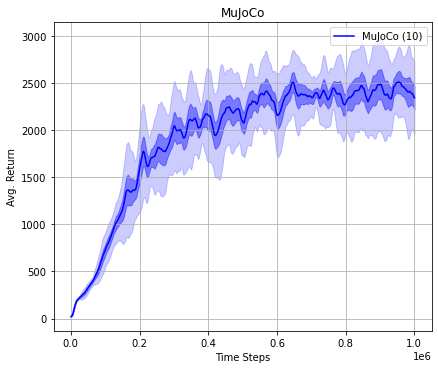

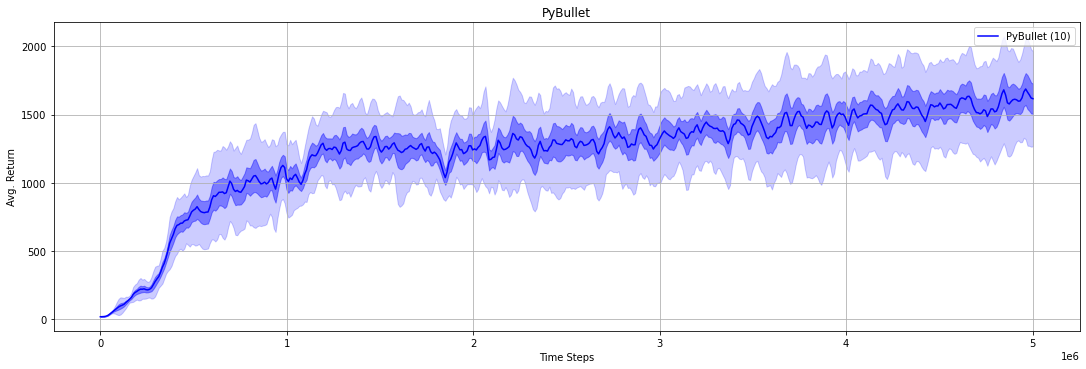

In [5]:
pu.plot_results(results_mujoco, average_group=True,figsize=(6,5),xlabel='Time Steps', ylabel='Avg. Return');
pu.plot_results(results_pybullet, average_group=True,figsize=(15,5),xlabel='Time Steps', ylabel='Avg. Return');

Visualization of the averages of 10 runs. Once as a small graph to better compare to the Hopper-V1 target curves, an once as a large graph to compare to the Baselines benchmarks.

The lighter shade shows the standard deviation of data, and darker shade - error in estimate of the mean (that is, standard deviation divided by square root of number of seeds). Note that averaging over seeds requires resampling to a common grid, which, in turn, requires smoothing (using language of signal processing, we need to do low-pass filtering before resampling to avoid aliasing effects). 

## Gifs

In [7]:
l=m=10
tr="../Implementation/logs/MuJoCo/MuJoCo-"+str(np.argmax([results_mujoco[x][1]['eprewmean'][-1:].iloc[0] for x in range(0,l)]))
tr=tr+"/videos/*.mp4"
print("Best run in:",tr)

Best run in: ../Implementation/logs/MuJoCo/MuJoCo-5/videos/*.mp4


In [8]:
videos= glob.glob(tr)
labels=[int(x[x.rindex('o')+1:-4]) for x in videos]

zipped_lists = zip(labels, videos)
sorted_zipped_lists = sorted(zipped_lists)
lables = [element for element,_ in sorted_zipped_lists]
videos = [element for _, element in sorted_zipped_lists]
labels=['{:.0e}'.format(x) for x in labels]


In [9]:
tr_2="../Implementation/logs/PyBullet/PyBullet-"+str(np.argmax([results_pybullet[x][1]['eprewmean'][-1:].iloc[0] for x in range(0,m)]))
tr_2=tr_2+"/videos/*.mp4"
print("Best run in:",tr_2)

Best run in: ../Implementation/logs/PyBullet/PyBullet-7/videos/*.mp4


In [10]:
videos_pyBullet= glob.glob(tr_2)
labels_pybullet=[int(x[x.rindex('o')+1:-4]) for x in videos_pyBullet]

zipped_lists = zip(labels_pybullet, videos_pyBullet)
sorted_zipped_lists = sorted(zipped_lists)
labels_pybullet = [element for element,_ in sorted_zipped_lists]
videos_pyBullet = [element for _, element in sorted_zipped_lists]
labels_pybullet=['{:.0e}'.format(x) for x in labels_pybullet]


### MuJoCo

In [11]:
aux="<td><p>After %s steps</p><video width='280' height='200' controls autoplay loop> <source src='%s' type='video/mp4'></video></td>" # Autoplay not working in html.
stri="<table><tr>"+aux*6+"</tr></table>"
print("Videos of best policiy simulated on 1000 Steps after training for:")
display(HTML(stri%(labels[0],videos[0],labels[2],videos[2],labels[4],videos[4],labels[6],videos[6],labels[8],videos[8],labels[10],videos[10])))

Videos of best policiy simulated on 1000 Steps after training for:


After 7e+05 steps,After 1e+06 steps,After 1e+05 steps,After 5e+05 steps,After 8e+05 steps,After 2e+05 steps


### PyBullet

In [12]:
print("Videos of best policiy simulated on 1000 Steps after training for:")
display(HTML(stri%(labels_pybullet[0],videos_pyBullet[0],labels_pybullet[2],videos_pyBullet[2],labels_pybullet[4],videos_pyBullet[4],labels_pybullet[6],videos_pyBullet[6],labels_pybullet[8],videos_pyBullet[8],labels_pybullet[10],videos_pyBullet[10])))

Videos of best policiy simulated on 1000 Steps after training for:


After 0e+00 steps,After 1e+06 steps,After 2e+06 steps,After 3e+06 steps,After 4e+06 steps,After 5e+06 steps


# Comparisson

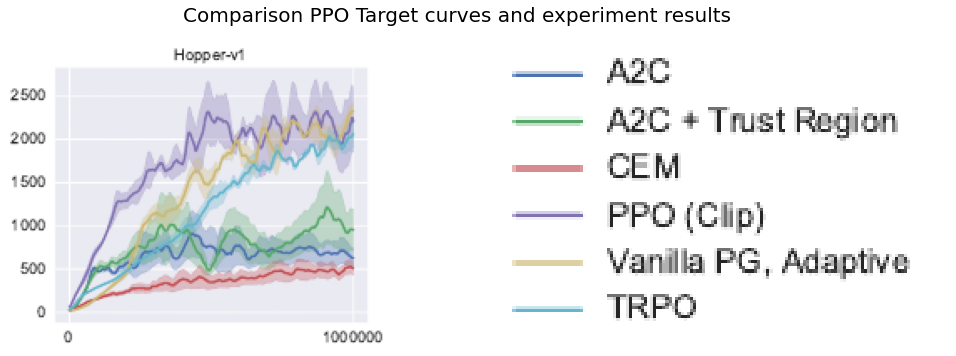

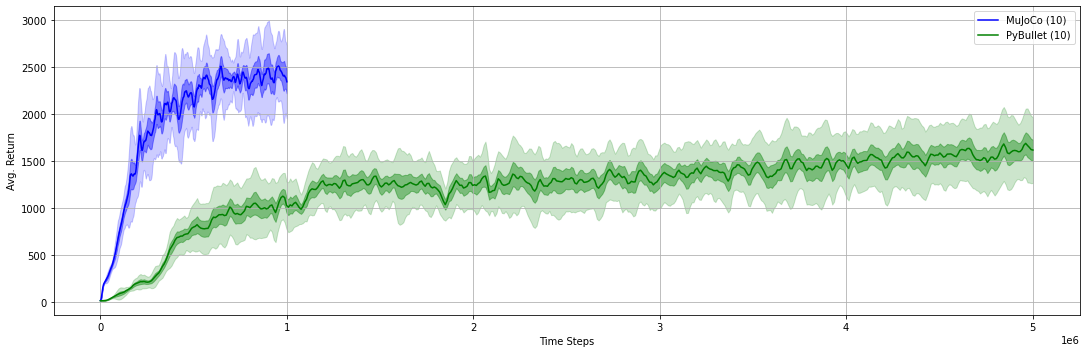

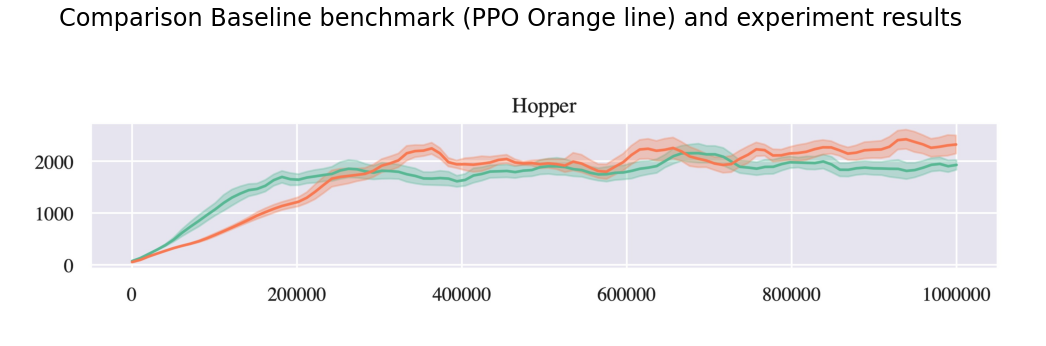

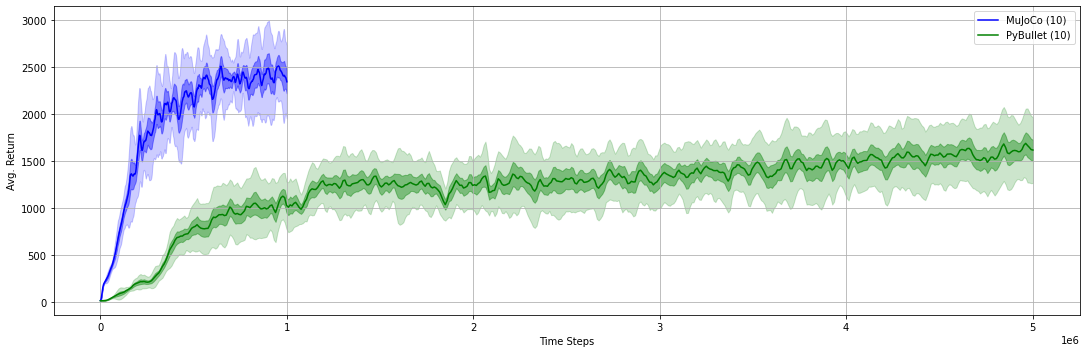

In [13]:
img1 = plt.imread('../Implementation/imgs/original.png')
img2 = plt.imread('../Implementation/imgs/legend.png')
img3 = plt.imread('../Implementation/imgs/base_org.jpeg')

NUM_ROWS = 1
IMGs_IN_ROW = 2
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(15,5))

ax[0].imshow(img1)
ax[1].imshow(img2)



title = 'Comparison PPO Target curves and experiment results'

f.suptitle(title, fontsize=20)
ax[0].axis('off')
ax[1].axis('off')

plt.tight_layout()
plt.show()

pu.plot_results(results, average_group=True,figsize=(15,5),xlabel='Time Steps', ylabel='Avg. Return' , split_fn=lambda _: '');


NUM_ROWS = 1
IMGs_IN_ROW = 1
f, ax = plt.subplots(NUM_ROWS, IMGs_IN_ROW, figsize=(15,5))

ax.imshow(img3)



title = 'Comparison Baseline benchmark (PPO Orange line) and experiment results'
f.suptitle(title, fontsize=24)

plt.tight_layout()
plt.axis('off')
plt.show()
pu.plot_results(results, average_group=True,figsize=(15,5),xlabel='Time Steps', ylabel='Avg. Return' , split_fn=lambda _: '');


# Make html and terminate tensorboard
##  <font color='red'>This will close all running tensorboards</font>  if terminate is set to True <a class="tocSkip">


In [16]:
terminate = True

See [RISE PDF Export](https://rise.readthedocs.io/en/stable/exportpdf.html) for slide download instructions

In [14]:
!jupyter nbconvert --to slides Presentation_notebook.ipynb
!jupyter nbconvert --to slides Presentation_notebook.ipynb --post serve




[NbConvertApp] Converting notebook Presentation_notebook.ipynb to slides
[NbConvertApp] Writing 964153 bytes to Presentation_notebook.slides.html
[NbConvertApp] Converting notebook Presentation_notebook.ipynb to slides
[NbConvertApp] Writing 964153 bytes to Presentation_notebook.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Presentation_notebook.slides.html
Use Control-C to stop this server
^C

Interrupted


In [ ]:
if terminate:
    try:
        tokill=!ls /tmp/.tensorboard-info/
        tokill=tokill[0][4:-5]
        !kill $tokill
        print("Tensorboard terminated")
    except:
        print("Tensorboard not running")